In [36]:
#import tdt
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
%matplotlib inline

In [37]:
with open('C://Data//hislight_pickles//adlib_light.pickle', 'rb') as handle:
    adlib_light = pickle.load(handle)

In [38]:
with open('C://Data//hislight_pickles//restricted_dark.pickle', 'rb') as handle:
    restricted_dark = pickle.load(handle)

In [39]:
with open('C://Data//hislight_pickles//adlib_dark.pickle', 'rb') as handle:
    adlib_dark = pickle.load(handle)

In [40]:
with open('C://Data//hislight_pickles//adlib_sucralose.pickle', 'rb') as handle:
    adlib_sucralose = pickle.load(handle)

In [41]:
def get_mice(data):
    mice = []
    for key, val in data.items():
        if val["mouse_ID"] not in mice:
            mice.append(val["mouse_ID"])
    return mice

In [42]:
def get_lick_data (data, mice):
    
    licks = [] #empty list where data from all mice will be stored
    burst_number = []
    burst_size = []
    burst_size_first_3 = []
    
    for mouse in mice:
        temp_total = []
        temp_lick = []
        temp_burstnum = []
        temp_burstsize = []
        temp_burstsize_first_3 = []
        
        for key, val in data.items():
            if val["mouse_ID"] == mouse:
                onset= val["licks"]
                lickdata = tp.lickCalc(onset, minburstlength=3)
                temp_total.append(lickdata["total"])
                temp_lick.append(lickdata["licks"])
                temp_burstnum.append(lickdata["bNum"])
                temp_burstsize.append(lickdata["bMean"])
                temp_burstsize_first_3.append(lickdata["bMean-first3"])

        licks.append(np.mean(temp_total))
        burst_number.append(np.mean(temp_burstnum))
        burst_size.append(np.mean(temp_burstsize))
        burst_size_first_3.append(np.mean(temp_burstsize_first_3))
        
    data_to_return = {"licks":licks, "burst number": burst_number, "burst size": burst_size, "burst size first 3": burst_size_first_3}
    return data_to_return

In [43]:
mice= get_mice(adlib_light)
print(mice)

['HL202', 'HL203', 'HL204', 'HL205', 'HL206', 'HL207', 'HL208', 'HL209', 'HL210', 'HL211', 'HL212']


In [44]:
adlib_light= get_lick_data(adlib_light, mice)
adlib_dark= get_lick_data(adlib_dark, mice)
adlib_sucralose= get_lick_data(adlib_sucralose, mice)
restricted_dark= get_lick_data(restricted_dark, mice)

C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\lick_utils.py:249: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))


Could not calculate burst probability
Could not calculate burst probability
Could not calculate burst probability
Optimal fit parameters not found
Could not calculate burst probability
Could not calculate burst probability


In [45]:
colors = ["#D83F31", "#EE9322", "#219C90","#E9B824"]

Text(0, 0.5, 'licks')

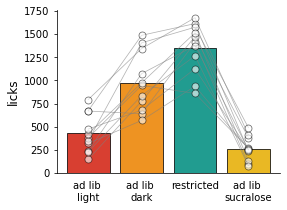

In [46]:
# MEAN LICKS PER SESSION

f,ax=plt.subplots(figsize=(4,3), ncols=1)

tp.barscatter([adlib_light["licks"], adlib_dark["licks"], restricted_dark["licks"], adlib_sucralose["licks"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              grouplabel= ["ad lib \nlight", "ad lib \ndark", "restricted", "ad lib \nsucralose"],
              scatteralpha=0.6,
              ax=ax)

ax.set_ylabel("licks", fontsize = 12)


Text(0, 0.5, 'burst size first 3')

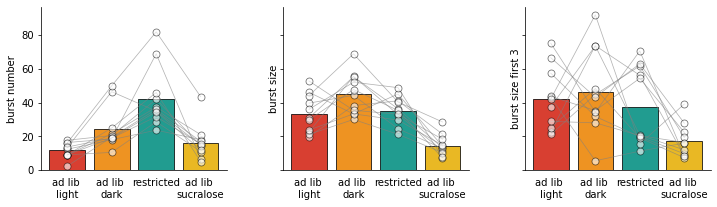

In [47]:
f,ax=plt.subplots(figsize=(12, 3), ncols=3, sharey=True)
plt.subplots_adjust(wspace=0.3)

tp.barscatter([adlib_light["burst number"], adlib_dark["burst number"], restricted_dark["burst number"], adlib_sucralose["burst number"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              grouplabel= ["ad lib \nlight", "ad lib \ndark", "restricted", "ad lib \nsucralose"],
              scatteralpha=0.6,
              ax=ax[0])

tp.barscatter([adlib_light["burst size"], adlib_dark["burst size"], restricted_dark["burst size"], adlib_sucralose["burst size"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              grouplabel= ["ad lib \nlight", "ad lib \ndark", "restricted", "ad lib \nsucralose"],
              scatteralpha=0.6,
              ax=ax[1])

tp.barscatter([adlib_light["burst size first 3"],adlib_dark["burst size first 3"], restricted_dark["burst size first 3"], adlib_sucralose["burst size first 3"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              grouplabel= ["ad lib \nlight", "ad lib \ndark", "restricted", "ad lib \nsucralose"],
              scatteralpha=0.6,
              ax=ax[2])

ax[0].set_ylabel("burst number")
ax[1].set_ylabel("burst size")
ax[2].set_ylabel("burst size first 3")

In [84]:
def get_runs(onset, min_run_length=3, run_threshold=10):

    current_list = []
    runs = []
    
    for i in range(1, len(onset)):
        time_diff = (onset[i] - onset[i - 1])
        if time_diff <= run_threshold:
            current_list.append(onset[i])
        else:
            current_list = [onset[i]]
            runs.append(current_list)
            
    no_short_runs = []
    
    for run in runs:
        if len(run)>min_run_length-1:
            no_short_runs.append(run)
     
    time_zeroed_runs = []
    
    for run in no_short_runs:
        time_zeroed_runs.append([t-run[0] for t in run])

    return time_zeroed_runs

def get_runs_from_all (mice, onset):

    temp_runs = []
    
    for mouse in mice:
        temp_runs.append(get_runs(onset))
    print(temp_runs)
      
    all_runs = []
    
    for session in temp_runs:
        for run in session:
            all_runs.append(run)
            
    return all_runs


In [85]:
test= adlib_light["licks"]

In [86]:
len(test)

11

In [87]:
unrestricted_runs = get_runs_from_all(mice, test)

[[[0.0, -432.66666666666663, -525.0]], [[0.0, -432.66666666666663, -525.0]], [[0.0, -432.66666666666663, -525.0]], [[0.0, -432.66666666666663, -525.0]], [[0.0, -432.66666666666663, -525.0]], [[0.0, -432.66666666666663, -525.0]], [[0.0, -432.66666666666663, -525.0]], [[0.0, -432.66666666666663, -525.0]], [[0.0, -432.66666666666663, -525.0]], [[0.0, -432.66666666666663, -525.0]], [[0.0, -432.66666666666663, -525.0]]]


In [71]:
unrestricted_runs

[[0.0, -432.66666666666663, -525.0],
 [0.0, -432.66666666666663, -525.0],
 [0.0, -432.66666666666663, -525.0],
 [0.0, -432.66666666666663, -525.0],
 [0.0, -432.66666666666663, -525.0],
 [0.0, -432.66666666666663, -525.0],
 [0.0, -432.66666666666663, -525.0],
 [0.0, -432.66666666666663, -525.0],
 [0.0, -432.66666666666663, -525.0],
 [0.0, -432.66666666666663, -525.0],
 [0.0, -432.66666666666663, -525.0]]

In [18]:
bins= np.arange(-5,40,1)

unrestricted_hist = np.histogram(tp.flatten_list(unrestricted_runs), bins= bins)

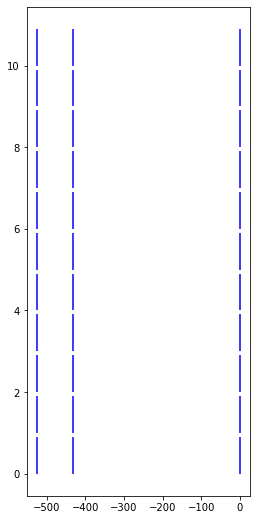

In [24]:
def sort_runs(runs):
    sort_order = np.argsort([x[-1]for x in runs])
    runs_sorted = [runs[i] for i in sort_order]
    
    return runs_sorted 

unrestricted_sorted_runs = sort_runs(unrestricted_runs)

f,ax = plt.subplots(figsize=(4, 9),nrows=1, sharex = True)
for idx, run in enumerate(unrestricted_sorted_runs):
    ax.vlines(run, idx, idx+0.9, color= "blue")